# Figure 3

---

Author: Riley X. Brady

Date: 11/18/2020

Dissolved inorganic sources for each of our four topographic regions, using memory time analysis to derive their origin.

In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2
import figutils
import numpy as np
import xarray as xr
import esmtools
import proplot as plot
import matplotlib.pyplot as plt

from dask.distributed import Client

In [2]:
import matplotlib

print(f"numpy: {np.__version__}")
print(f"xarray: {xr.__version__}")
print(f"esmtools: {esmtools.__version__}")
print(f"proplot: {plot.__version__}")
print(f"matplotlib: {matplotlib.__version__}")

numpy: 1.19.4
xarray: 0.16.1
esmtools: 1.1.3
proplot: 0.6.4
matplotlib: 3.3.3


See notebook 1.03 for calculation to find x/y memory time origin of DIC for the 1000 m upwelling.

In [3]:
drake = xr.open_dataset("../data/postproc/drake.1000m.tracer.origin.nc")
crozet = xr.open_dataset("../data/postproc/crozet.1000m.tracer.origin.nc")
kerguelan = xr.open_dataset("../data/postproc/kerguelan.1000m.tracer.origin.nc")
campbell = xr.open_dataset("../data/postproc/campbell.1000m.tracer.origin.nc")
nontopo = xr.open_dataset("../data/postproc/non_topographic.1000m.tracer.origin.nc")

## Visualization

---

Note I pieced all of the individual panels together in Illustrator. I couldn't get clean side panels just through `matplotlib`.

1. Individual source panels. I then saved out an instance of the colorbar separately.

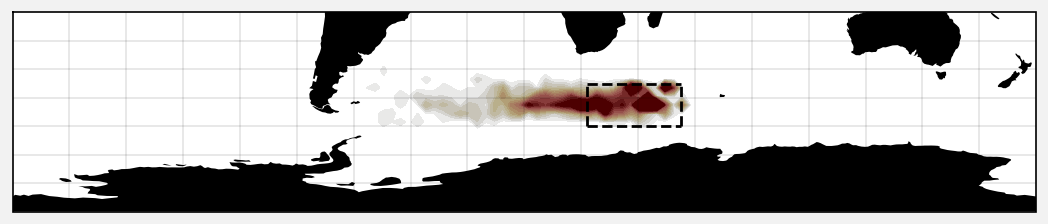

In [4]:
f, ax = plot.subplots(proj="cyl", tight=True, axwidth="130mm")

region = "crozet"
result = eval(region)
xorig = result["x"]
yorig = result["y"]
hist = figutils.return_xhist_crossings(xorig, yorig, 3)
hist_nm = (hist / hist.sum()) * 100

# Main plot
p = ax.contourf(
    hist_nm.lon,
    hist_nm.lat,
    hist_nm,
    levels=plot.arange(0, 1.5, 0.1),
    cmap="bilbao",
    extend="max",
    globe=True,
)
ax.format(
    land=True,
    latlim=(-90, -20),
    lonlim=(-180, 180),
    labels=False,
    latlines=10,
    lonlines=20,
)

x0, x1, y0, y1 = figutils.BOUNDS[region]
if region == "drake":
    x0 += 360
    x1 += 360
figutils.plot_box(ax, x0, x1, y0, y1, linewidth=1.0, linestyle="--")

2. Zonal integration of particles.

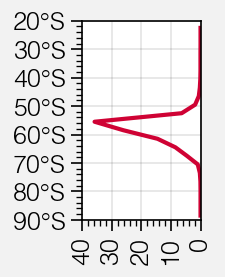

In [5]:
# Dimensions pulled from illustrator for above plot.
f, ax = plot.subplots(axwidth="15mm", axheight="25.278mm")

region = "drake"
result = eval(region)
xorig = result["x"]
yorig = result["y"]

# Use xhistogram to bin the particle origins and sum over them.
hist = figutils.return_xhist_crossings(xorig, yorig, 3)
hist_nm = (hist / hist.sum()) * 100

res = hist_nm.sum("lon").sel(lat=slice(-90, -20))
ax.plot(res, res.lat, color="cherry", linewidth=1.5)

ax.format(
    ylabel="",
    xlabel="",
    ylocator=10,
    xlim=(0, 40),
    ylim=(-90, -20),
    xlocator=10,
    yformatter="deglat",
    xrotation=90,
    #     xtickloc="top",
    xreverse=True,
)

3. Meridional integration of particles.

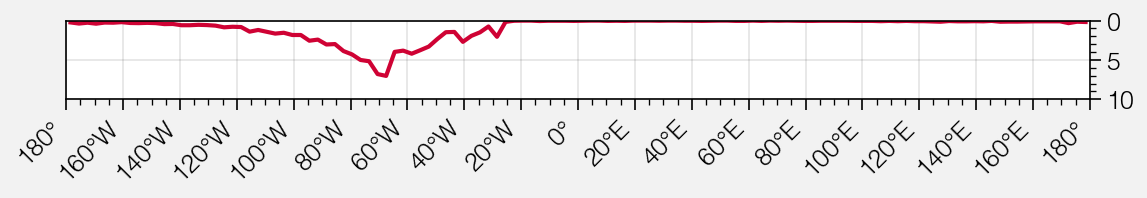

In [6]:
# Dimensions pulled from illustrator for above plot.
f, ax = plot.subplots(axwidth="130mm", axheight="10mm")

region = "drake"
result = eval(region)
xorig = result["x"]
yorig = result["y"]

# Use xhistogram to bin the particle origins and sum over them.
hist = figutils.return_xhist_crossings(xorig, yorig, 3)
hist_nm = (hist / hist.sum()) * 100

res = hist_nm.sum("lat")
res = esmtools.grid.convert_lon(res)
ax.plot(res.lon, res, color="cherry", linewidth=1.5)

ax.format(
    ylabel="",
    xlabel="",
    ylim=(0, 10),
    ylocator=5,
    xlim=(-180, 180),
    xlocator=20,
    xformatter="deglon",
    xrotation=45,
    ytickloc="right",
    yreverse=True,
)